In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [3]:
train_transaction = pd.read_csv('/content/drive/My Drive/Fraud Credit Dataset/train_transaction.csv', index_col='TransactionID')
train_identity = pd.read_csv('/content/drive/My Drive/Fraud Credit Dataset/train_identity.csv', index_col='TransactionID')
test_transaction = pd.read_csv('/content/drive/My Drive/Fraud Credit Dataset/test_transaction.csv', index_col='TransactionID')
test_identity = pd.read_csv('/content/drive/My Drive/Fraud Credit Dataset/test_identity.csv', index_col='TransactionID')
sample_submission = pd.read_csv('/content/drive/My Drive/Fraud Credit Dataset/sample_submission.csv', index_col='TransactionID')

In [4]:
train = train_transaction.merge(train_identity, how='left',left_index=True, right_index=True)
print(train.shape)
train.head()

(590540, 433)


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
train.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579,...,13.103775,9.184612,0.058494,0.851040,0.296633,0.336790,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,202.726660,...,106.739813,73.627893,0.304415,3.950295,1.364356,1.580144,8.769083,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,-83.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,0.000000,3.027058e+06,43.321000,6019.000000,214.

In [6]:
Y_train = train['isFraud'].copy()
X_train = train.drop('isFraud', axis=1)

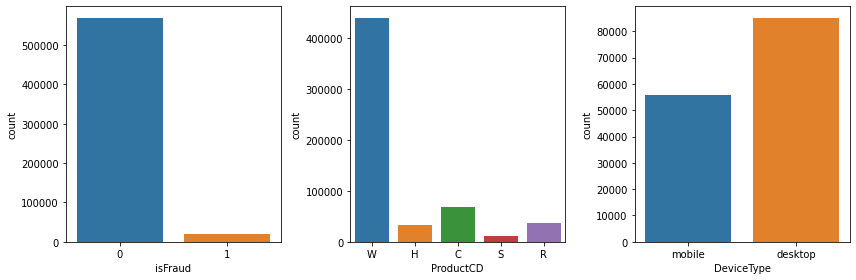

In [7]:
f, axes = plt.subplots(1, 3, figsize=(12, 4))
isFraud = sns.countplot(x='isFraud', data=train, ax=axes[0])
#Fraud data is skewed because there are too many Class 0 values compared to 1 (i.e less actual frauds)
ProductCD = sns.countplot(x='ProductCD', data=train, ax=axes[1])
#Product Code has the product for each transaction
DeviceType = sns.countplot(x='DeviceType', data=train, ax=axes[2])
#Desktop is being used more than Mobile for Transactions
plt.tight_layout()

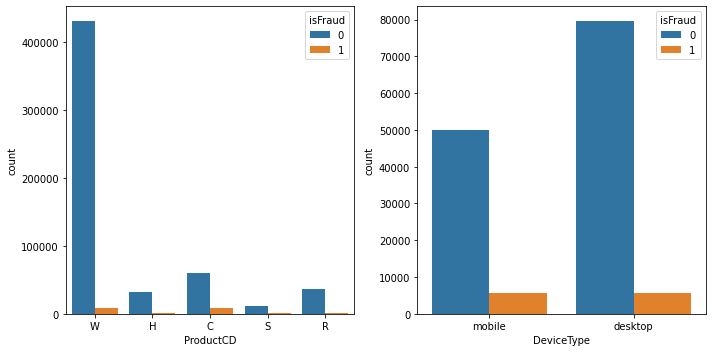

In [8]:
#Number of fraud transactions per Product Code and Device Type
#C and w Products have the highest number of Fraud Transactions
#Mobile and Desktop have relatively same number of Fraud Transactions
#But in Mobile comparitively proportion is more

f, axes = plt.subplots(1, 2, figsize=(10, 5))
ProductCD = sns.countplot(x='ProductCD', hue="isFraud", data=train, ax=axes[0])
DeviceType = sns.countplot(x='DeviceType', hue="isFraud", data=train, ax=axes[1])
plt.tight_layout()

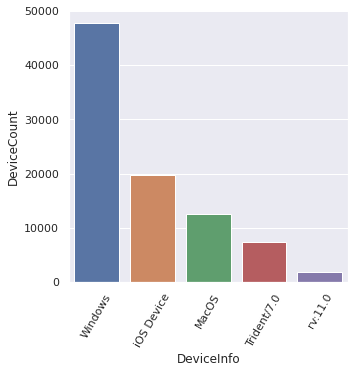

In [9]:
#Finding the max count of devices being used for transactions
group = pd.DataFrame()
group['DeviceCount'] = train.groupby(['DeviceInfo'])['DeviceInfo'].count()
group['DeviceInfo'] = group.index
#Top 5 Devices being used
group_top = group.sort_values(by='DeviceCount',ascending=False).head(5)

plt.figure(figsize=(5, 5))
sns.set(color_codes=True)
ax = sns.barplot(x="DeviceInfo", y="DeviceCount", data=group_top)
xt = plt.xticks(rotation=60)

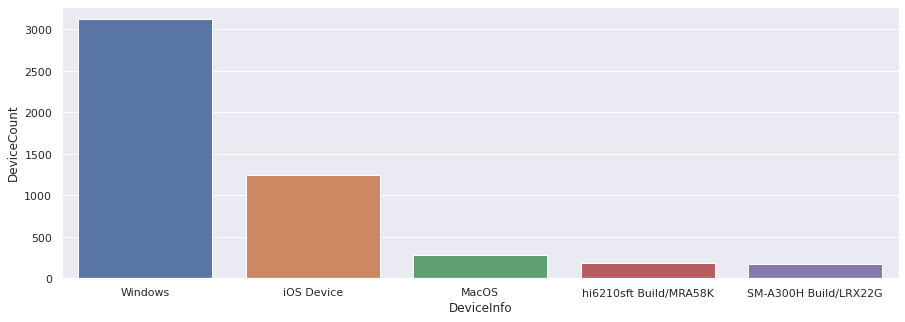

In [10]:
#Fraud Count per Operating System
fraud = pd.DataFrame()
is_fraud = train[train['isFraud']==1]
fraud['DeviceCount'] = is_fraud.groupby(['DeviceInfo'])['DeviceInfo'].count()
fraud['DeviceInfo'] = fraud.index
group_top = fraud.sort_values(by='DeviceCount',ascending=False).head(5)
plt.figure(figsize=(15, 5))
sns.set(color_codes=True)
sns.barplot(x="DeviceInfo", y="DeviceCount", data=group_top)

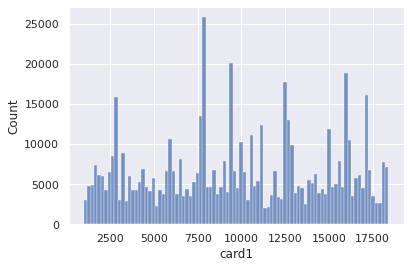

In [11]:
#Transactions found to be associated with the payment card (Plotting the distributions)

c1 = sns.histplot(train.card1.dropna())

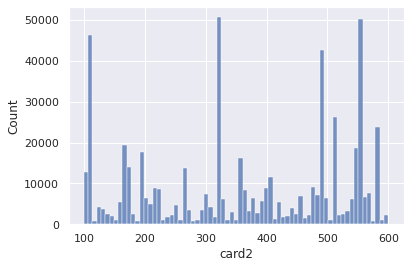

In [12]:
c2 = sns.histplot(train.card2.dropna())

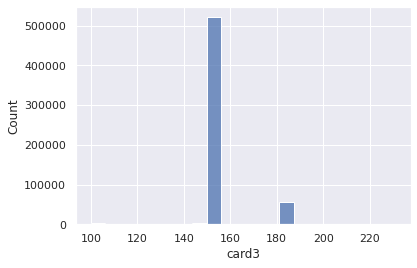

In [13]:
c3 = sns.histplot(train.card3.dropna())

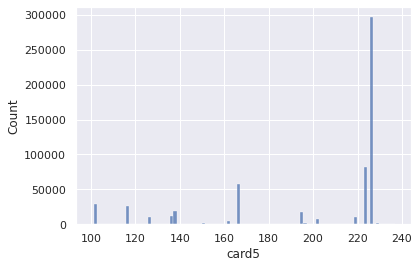

In [14]:
c5 = sns.histplot(train.card5.dropna())

In [15]:
#c4 = sns.histplot(train.card4.dropna()) Tried this but its having String values
#c6 = sns.histplot(train.card6.dropna()) Tried this but its having String values
#c7-c14 is unknown with NaN values

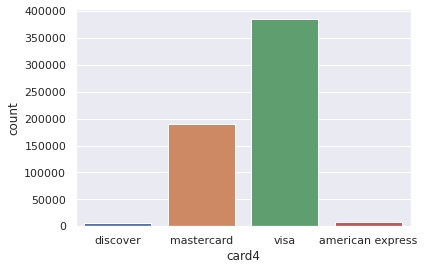

In [16]:
card4 = sns.countplot(x='card4', data=train)
#This shows us type of card used in the transaction

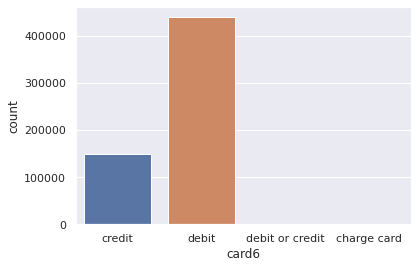

In [17]:
card6 = sns.countplot(x='card6', data=train)
#Most transactions are from debit card

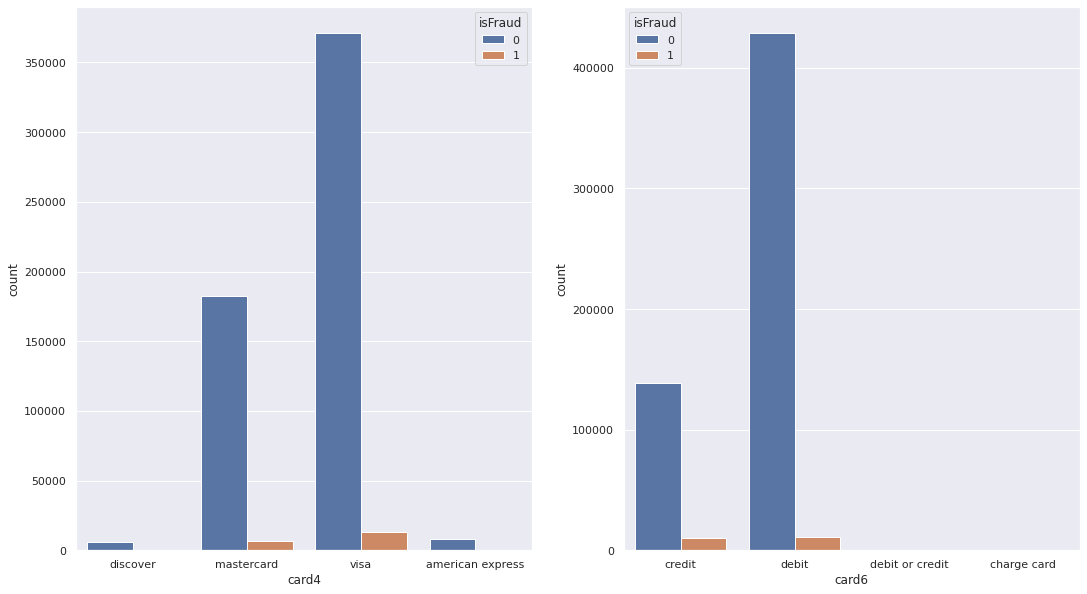

In [18]:
#Fraud Count per Card Company and Card Type
f, axes = plt.subplots(1, 2, figsize=(18, 10))
card4 = sns.countplot(x='card4', hue="isFraud", data=train, ax=axes[0])
card6 = sns.countplot(x='card6', hue="isFraud", data=train, ax=axes[1])

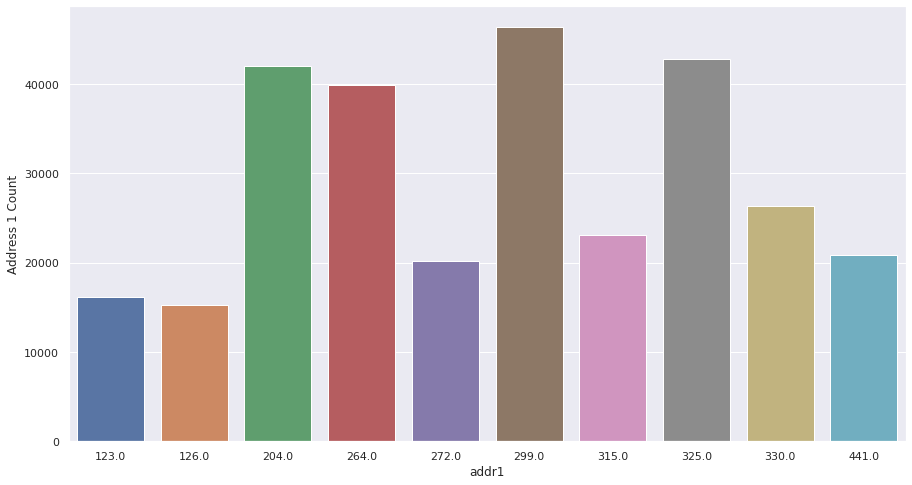

In [19]:
#Cant understand much but addr might be addresses for purchaser (addr1 as billing region addr2 as billing country)

group = pd.DataFrame()
group['Address 1 Count'] = train.groupby(['addr1'])['addr1'].count()
group['addr1'] = group.index

group_top = group.sort_values(by='Address 1 Count',ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.set(color_codes=True)
ax = sns.barplot(x="addr1", y="Address 1 Count", data=group_top)

Unique locations in Address 1: 332
Unique locations in Address 2: 74

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
16.0        55
31.0        47
19.0        33
26.0        25
27.0        20
Name: addr2, dtype: int64


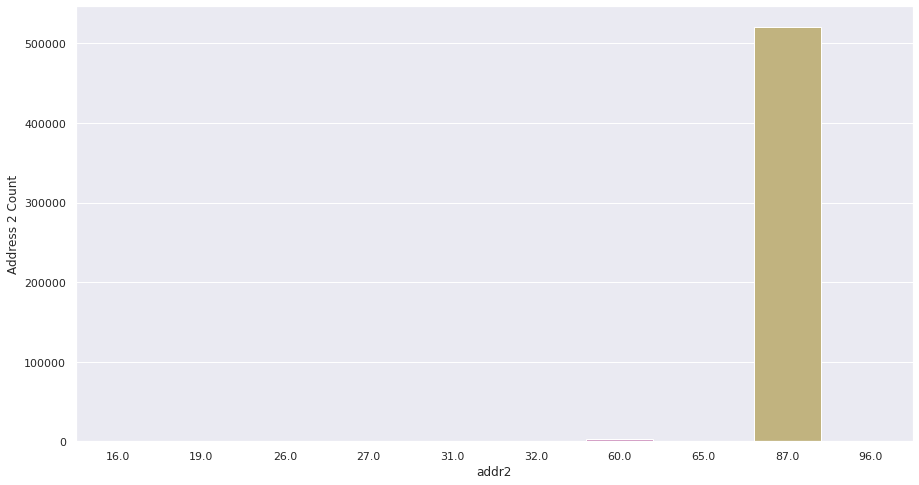

In [20]:
#Cant understand much but addr might be addresses for purchaser (addr1 as billing region addr2 as billing country)
print("Unique locations in Address 1:", train.addr1.nunique()) # There are 332 unique locations in Address 1
print("Unique locations in Address 2:", train.addr2.nunique()) # There are 74 unique locations in Address 2
print()

group = pd.DataFrame()
group['Address 2 Count'] = train.groupby(['addr2'])['addr2'].count()
group['addr2'] = group.index

group_top = group.sort_values(by='Address 2 Count',ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.set(color_codes=True)
ax = sns.barplot(x="addr2", y="Address 2 Count", data=group_top)

print(train.addr2.value_counts().head(10))
#Majority is seen to have outlier 87.0 as its address. (Very Vague)

Unique Purchaser Domains: 59
Unique Recipient Domains: 60


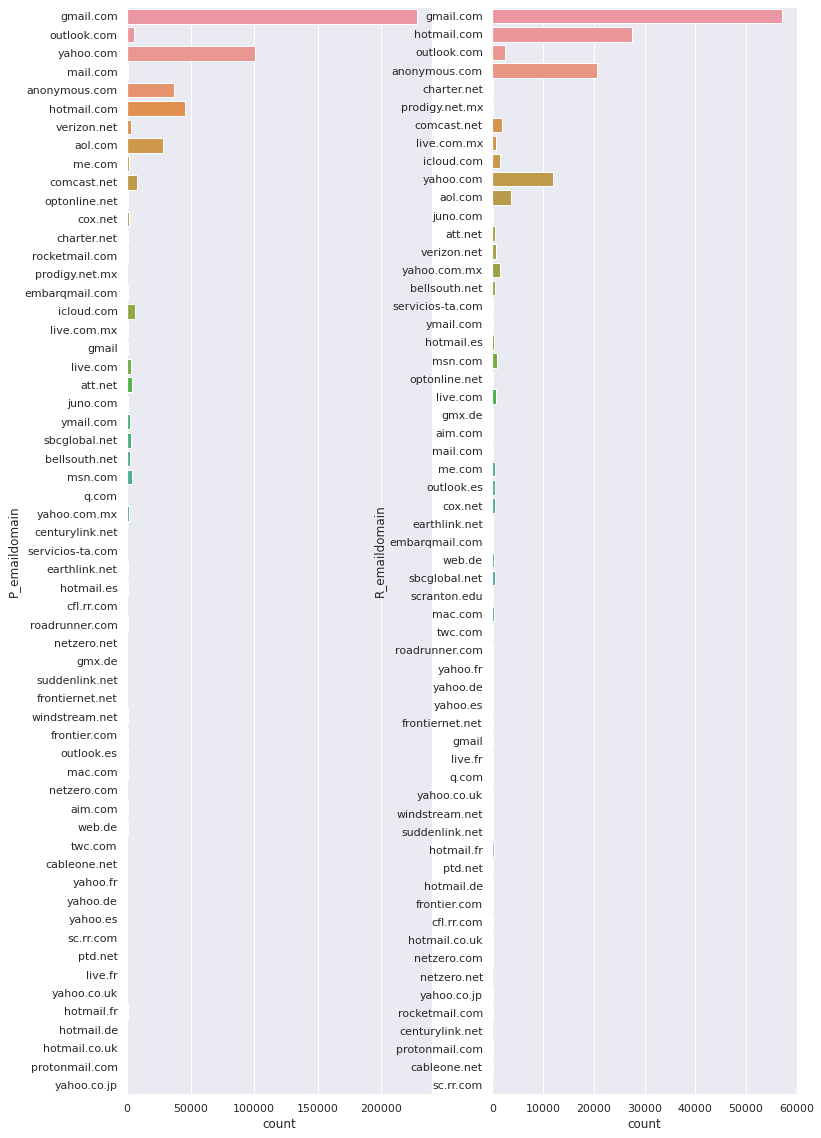

In [21]:
#Purchaser and Recipient email domain (Max are GMAIL)

print("Unique Purchaser Domains:", train.P_emaildomain.nunique()) # There are 59 unique domains in Purchasers
print("Unique Recipient Domains:", train.R_emaildomain.nunique()) #There are 60 unique domains in Recipients

f, axes = plt.subplots(1, 2, figsize=(12, 20))
sns.set(color_codes=True)
p_email = sns.countplot(y='P_emaildomain', data=train, ax=axes[0])
r_email = sns.countplot(y='R_emaildomain', data=train, ax=axes[1])

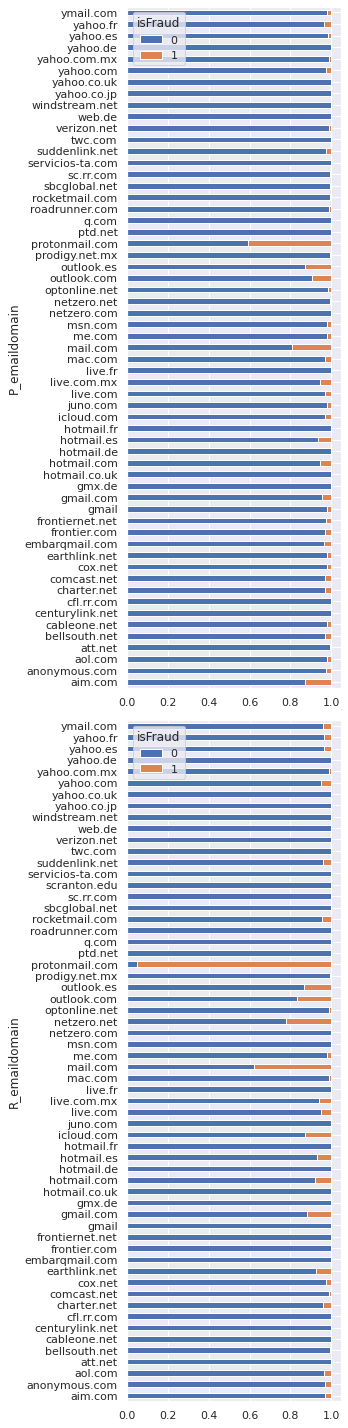

In [22]:
#Fraud Percentage per Email

f, axes = plt.subplots(2, 1, figsize=(5, 20))

props = train.groupby("P_emaildomain")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='barh', stacked='True', ax=axes[0])

props = train.groupby("R_emaildomain")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='barh', stacked='True', ax=axes[1])

plt.tight_layout()

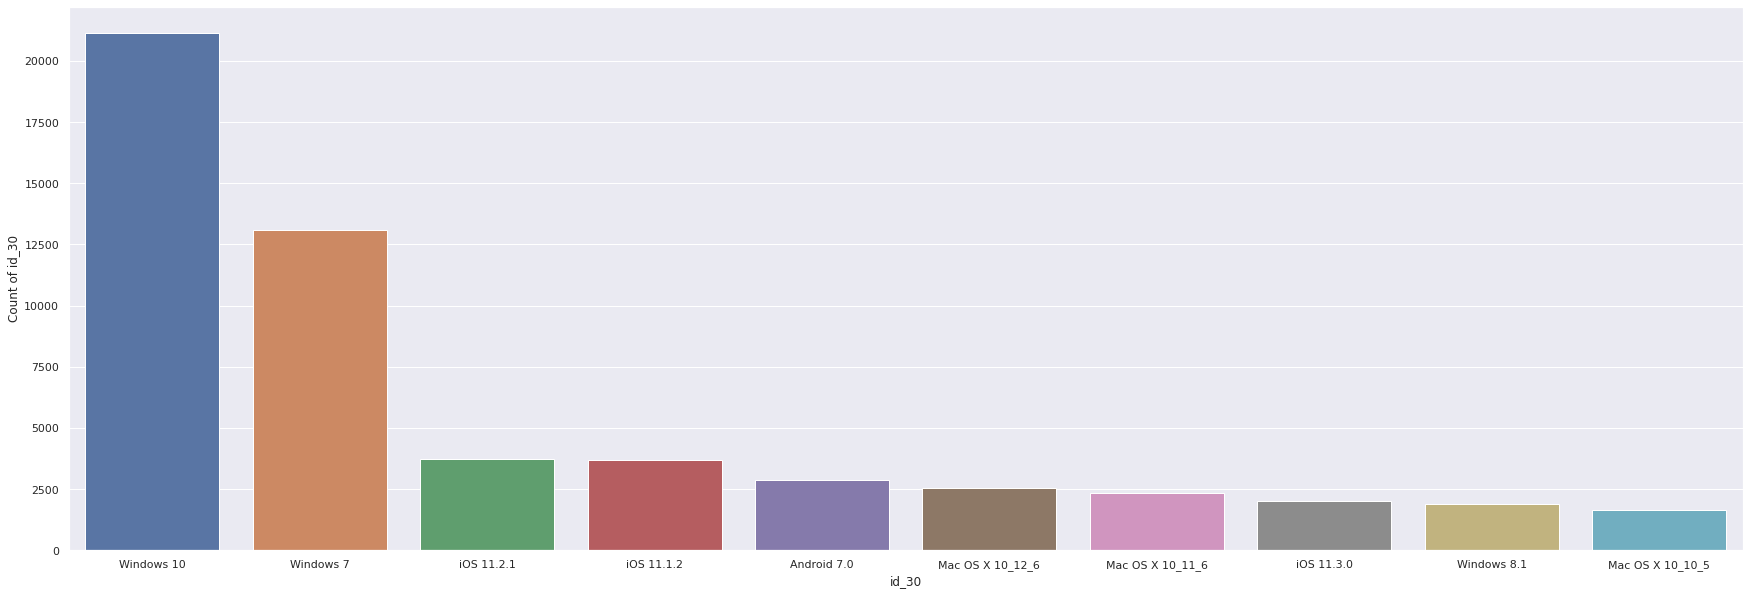

In [23]:
#M1 to M9 are whether informations match (such as names on card and address)
#id12-id38 are almost completely filled with NaN values
#id30 has Operating System whereas id31 has browser details

group = pd.DataFrame()
id12_loc = train.columns.get_loc("id_12")
id38_loc = train.columns.get_loc("id_38")
df_id = train.iloc[:,id12_loc:id38_loc+1]
group['Count of id_30'] = df_id.groupby(['id_30'])['id_30'].count()
group['id_30'] = group.index

group_top = group.sort_values(by='Count of id_30',ascending=False).head(10)

plt.figure(figsize=(30, 10))
ax = sns.barplot(x="id_30", y="Count of id_30", data=group_top)

#Most transactions are using Windows 10, Windows 7 and iOS

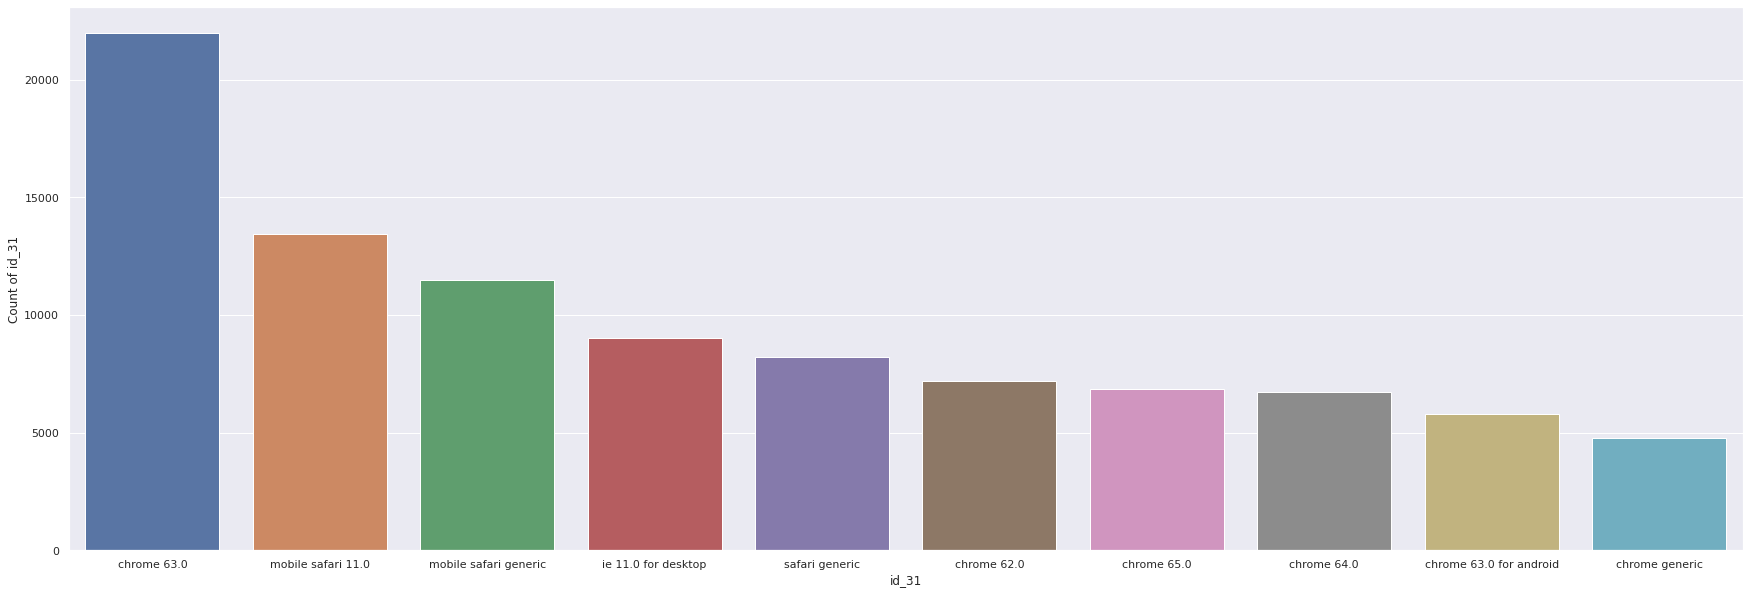

In [24]:
group = pd.DataFrame()
group['Count of id_31'] = df_id.groupby(['id_31'])['id_31'].count()
group['id_31'] = group.index

group_top = group.sort_values(by='Count of id_31',ascending=False).head(10)

plt.figure(figsize=(30, 10))
ax = sns.barplot(x="id_31", y="Count of id_31", data=group_top)

#Most transactions are done using the browser Chrome or Safari

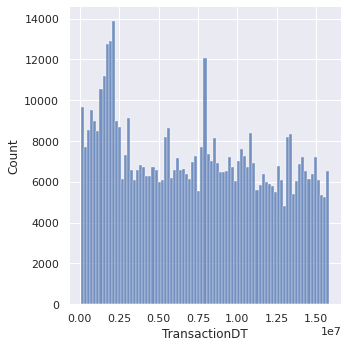

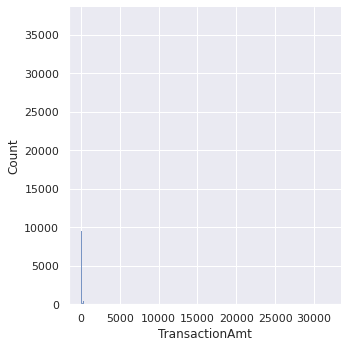

In [25]:
#TransactionDT is a timedelta from a given reference datetime
#TransactionAmt is transaction amount

dt = sns.displot(train.TransactionDT)
m = sns.displot(train.TransactionAmt)
plt.tight_layout()

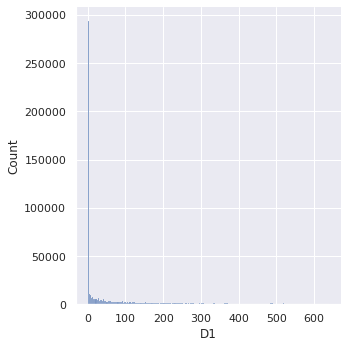

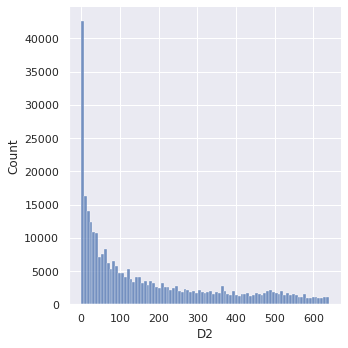

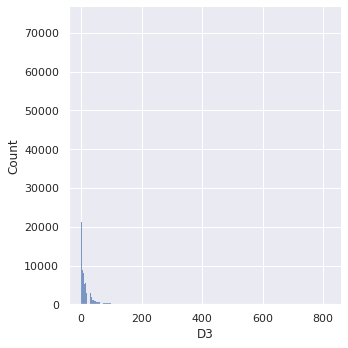

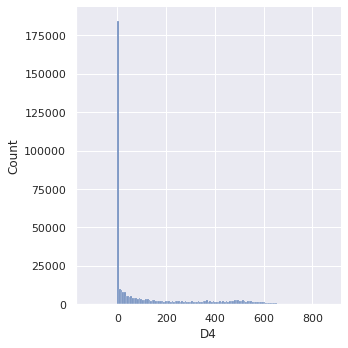

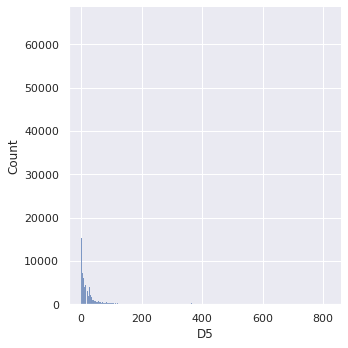

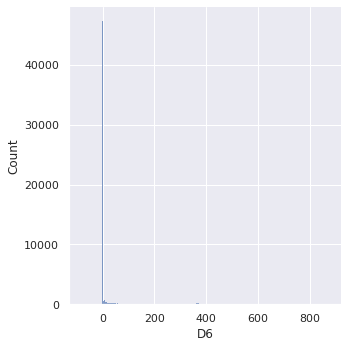

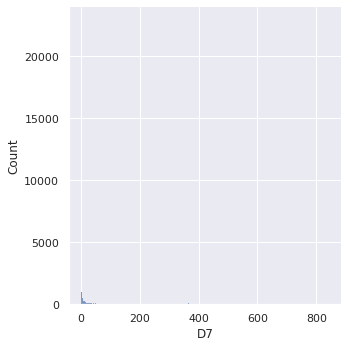

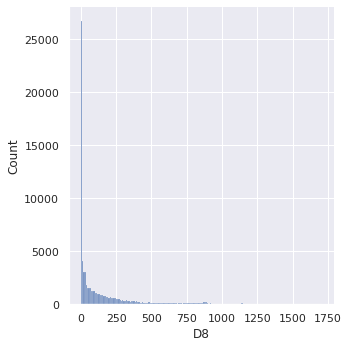

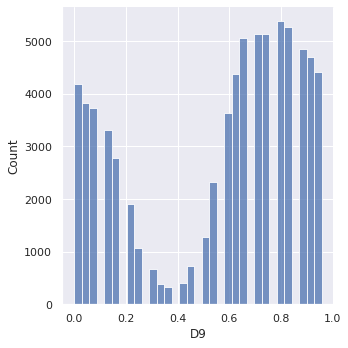

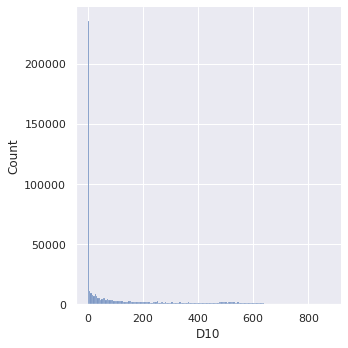

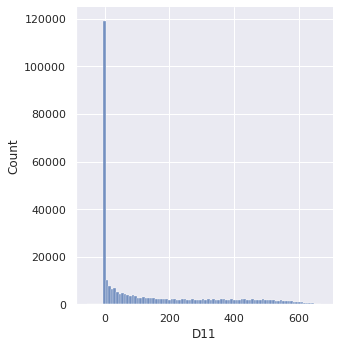

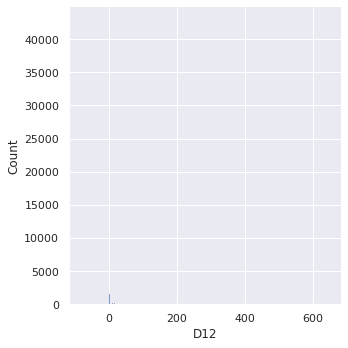

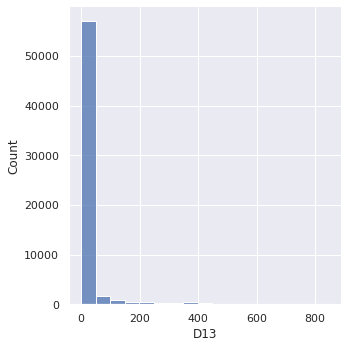

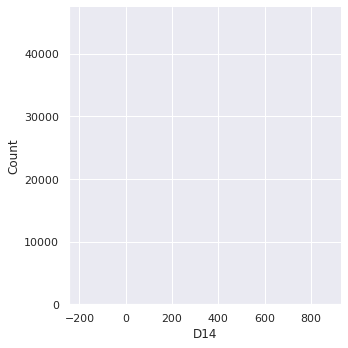

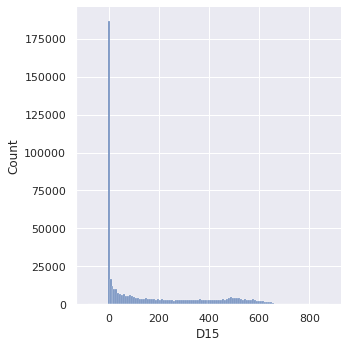

In [26]:
#Columns D1 - D15 are timedelta, such as days between transactions

D1_loc = train.columns.get_loc("D1")
D15_loc = train.columns.get_loc("D15")
df_d = train.iloc[:,D1_loc:D15_loc+1]
cols = df_d.columns
for i in range(15):
    d = sns.displot(df_d[cols[i]].dropna())
plt.tight_layout()

In [27]:
V1_loc = train.columns.get_loc("V1")
V339_loc = train.columns.get_loc("V339")
df = train.iloc[:,V1_loc:V339_loc+1]
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2987005,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


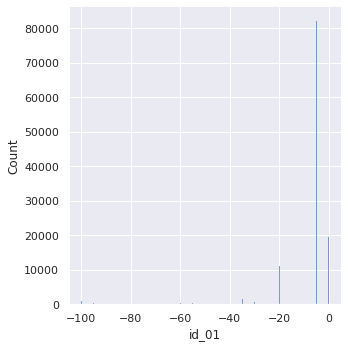

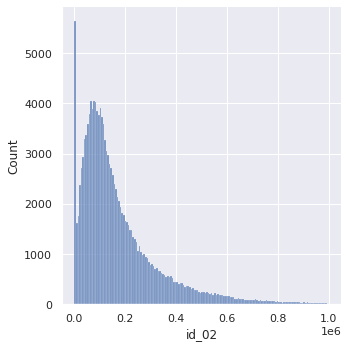

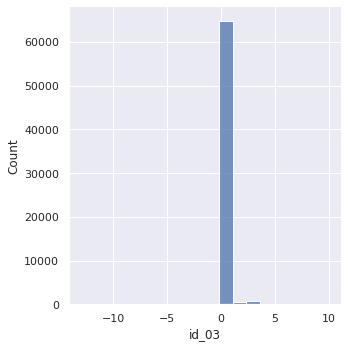

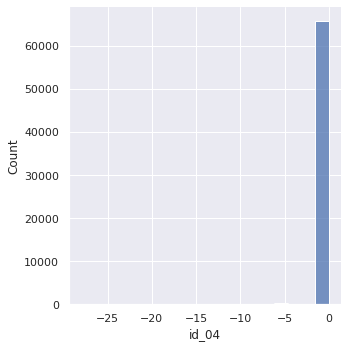

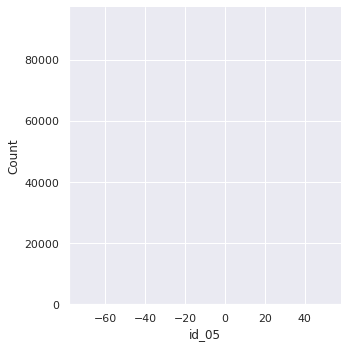

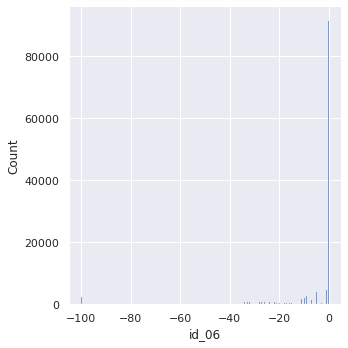

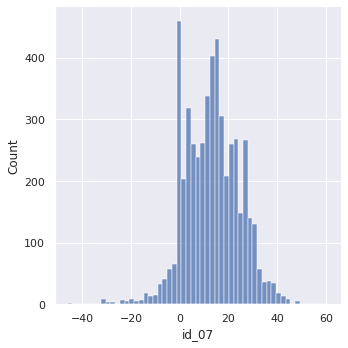

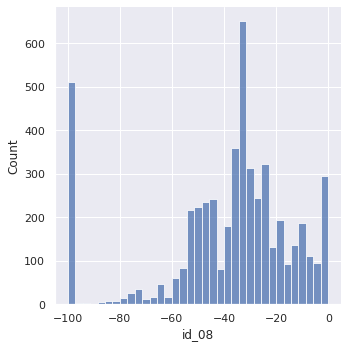

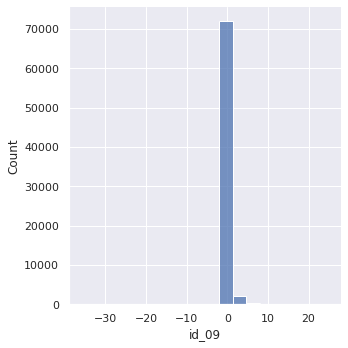

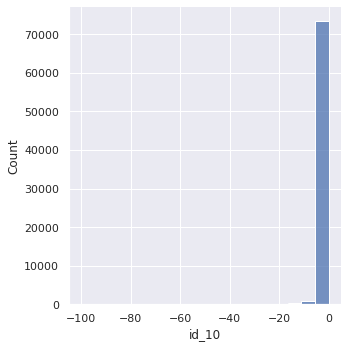

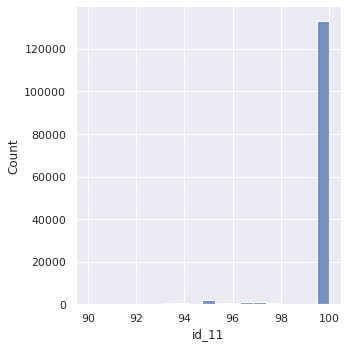

In [28]:
#id01 to id11 are numerical features for identity
#It mainly has network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions

id_01_loc = train.columns.get_loc("id_01")
id_11_loc = train.columns.get_loc("id_11")
df = train.iloc[:,id_01_loc:id_11_loc+1]
cols = df.columns
for i in range(11):
    d = sns.displot(df[cols[i]].dropna())
plt.tight_layout()